## Exemples de base avec Pandas

Ce notebook vous guidera à travers quelques concepts très basiques de Pandas. Nous commencerons par importer les bibliothèques typiques utilisées en science des données :


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Séries

Une série est similaire à une liste ou un tableau 1D, mais avec un index. Toutes les opérations sont alignées sur l'index.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


L'une des utilisations fréquentes des séries est **les séries temporelles**. Dans les séries temporelles, l'index a une structure particulière - généralement une plage de dates ou de datetimes. Nous pouvons créer un tel index avec `pd.date_range`.

Supposons que nous avons une série qui montre la quantité de produit achetée chaque jour, et nous savons que chaque dimanche, nous devons également prendre un article pour nous-mêmes. Voici comment modéliser cela en utilisant des séries :


Length of index is 366


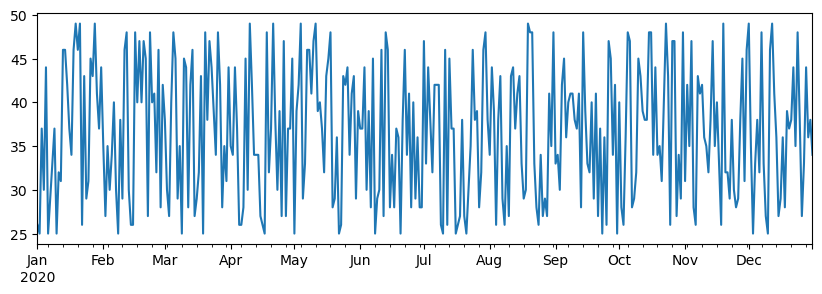

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Comme vous pouvez le voir, nous rencontrons des problèmes ici, car dans la série hebdomadaire, les jours non mentionnés sont considérés comme manquants (`NaN`), et ajouter `NaN` à un nombre nous donne `NaN`. Afin d'obtenir un résultat correct, nous devons spécifier `fill_value` lors de l'ajout des séries :


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


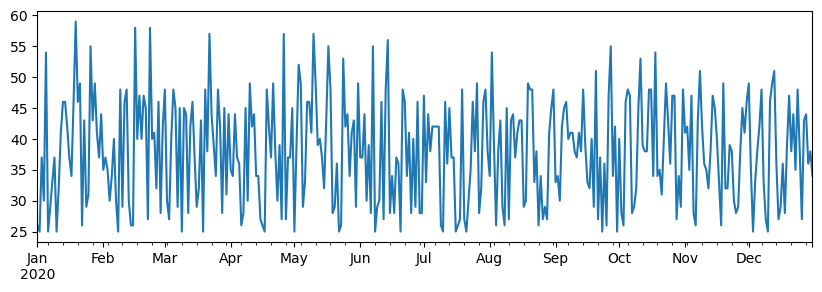

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

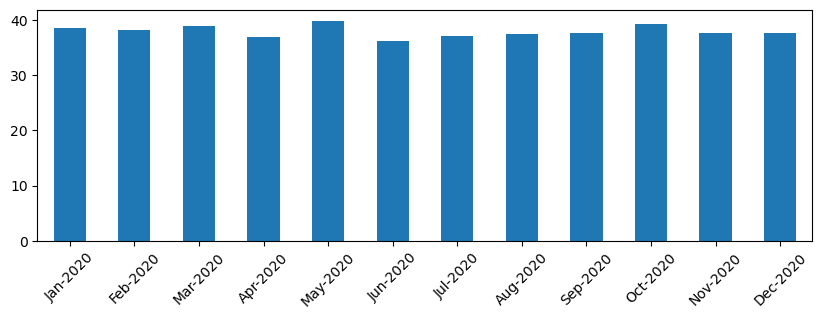

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Un dataframe est essentiellement une collection de séries partageant le même index. Nous pouvons combiner plusieurs séries ensemble pour former un dataframe. Étant donné les séries `a` et `b` définies ci-dessus :


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Nous pouvons également utiliser Series comme colonnes et spécifier les noms de colonnes à l'aide d'un dictionnaire :


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Le même résultat peut être obtenu en transposant (et ensuite en renommant les colonnes, pour correspondre à l'exemple précédent) :


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Sélectionner des colonnes** à partir d'un DataFrame peut se faire comme ceci :


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Sélection des lignes** en fonction de l'expression de filtre :


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

La façon dont cela fonctionne est que l'expression `df['A']<5` renvoie une série booléenne, qui indique si l'expression est `True` ou `False` pour chaque élément de la série. Lorsque la série est utilisée comme index, elle renvoie un sous-ensemble de lignes dans le DataFrame. Ainsi, il n'est pas possible d'utiliser une expression booléenne Python arbitraire, par exemple, écrire `df[df['A']>5 and df['A']<7]` serait incorrect. À la place, vous devez utiliser l'opération spéciale `&` sur les séries booléennes :


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Créer de nouvelles colonnes calculables**. Nous pouvons facilement créer de nouvelles colonnes calculables pour notre DataFrame en utilisant des expressions intuitives. Le code ci-dessous calcule la divergence de A par rapport à sa valeur moyenne.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Ce qui se passe réellement, c'est que nous calculons une série, puis attribuons cette série au côté gauche, créant ainsi une autre colonne.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Sélectionner des lignes en fonction des numéros** peut être fait en utilisant la construction `iloc`. Par exemple, pour sélectionner les 5 premières lignes du DataFrame :


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Le regroupement** est souvent utilisé pour obtenir un résultat similaire aux *tableaux croisés dynamiques* dans Excel. Supposons que nous souhaitons calculer la valeur moyenne de la colonne `A` pour chaque nombre donné de `LenB`. Ensuite, nous pouvons regrouper notre DataFrame par `LenB`, et appeler `mean` :


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Si nous devons calculer la moyenne et le nombre d'éléments dans le groupe, alors nous pouvons utiliser une fonction `aggregate` plus complexe :


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Impression et Visualisation

Un Data Scientist doit souvent explorer les données, il est donc important de pouvoir les visualiser. Lorsque le DataFrame est volumineux, il arrive souvent que nous voulions simplement nous assurer que tout fonctionne correctement en affichant les premières lignes. Cela peut être fait en appelant `df.head()`. Si vous l'exécutez depuis un Jupyter Notebook, il affichera le DataFrame sous une forme tabulaire agréable.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Nous avons également vu l'utilisation de la fonction `plot` pour visualiser certaines colonnes. Bien que `plot` soit très utile pour de nombreuses tâches et prenne en charge différents types de graphiques via le paramètre `kind=`, vous pouvez toujours utiliser la bibliothèque brute `matplotlib` pour tracer quelque chose de plus complexe. Nous aborderons la visualisation des données en détail dans des leçons de cours séparées.


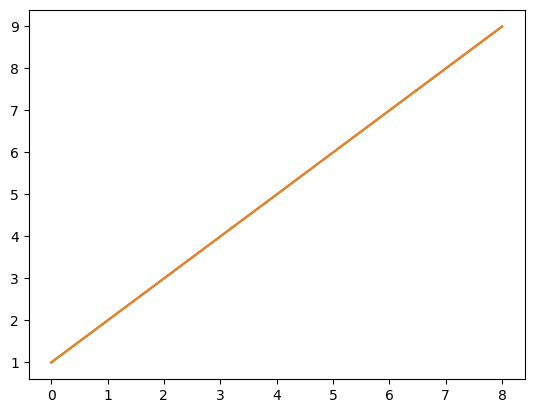

In [61]:
df['A'].plot()
plt.show()

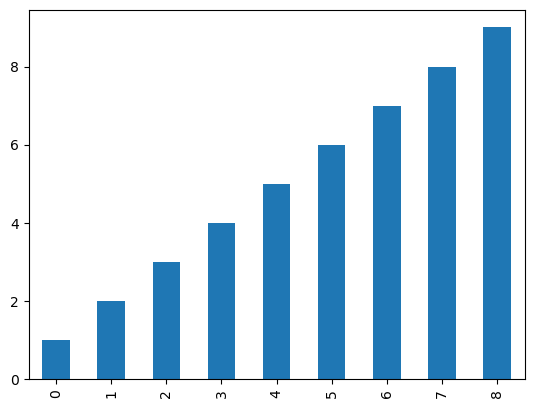

In [63]:
df['A'].plot(kind='bar')
plt.show()

Cette vue d'ensemble couvre les concepts les plus importants de Pandas, cependant, la bibliothèque est très riche et il n'y a aucune limite à ce que vous pouvez faire avec elle ! Appliquons maintenant ces connaissances pour résoudre un problème spécifique.



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de recourir à une traduction professionnelle effectuée par un humain. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
